# Simulation

In this lesson, we will work through several examples of using random numbers to simulate real-world scenarios.

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(1349)

### How will we utilize Python to obtain probabilities?

We will utilize Monte Carlo simulations.

A Monte Carlo simulation is a means to recreate potential events and empirically take the results of simiulated trials to obtain a reasonably precise estimate of a desired probability.

What does this mean for us here?

In [ ]:
# Let's take a hypothetical base probability. 
# What is the probability of rolling a one (1) on a single, standard, fair six-sided die?

In [9]:
# Potential outcomes of a die roll:
possible_outcomes = [1, 2, 3, 4, 5, 6]

In [ ]:
# options that equal 1: just 1, literally one

In [ ]:
ideal_roll = 1

In [ ]:
# theroretical probability: 1/6

In [3]:
1/6

0.16666666666666666

In [ ]:
# Now how would we do this with a simulation?


In [ ]:
# We will do it utilizing a large number of trials, that we calculate.

In [ ]:
# Allow us to examine the same problem: Probability of rolling a 1 on a fair six-sided die.

In [4]:
# First, we will set a value for the number of trials that we want to conduct.
# We have the power of computation at our finger tips, so let's shoot for something like one million.

num_trials = 10 ** 5
# each trial is a row and simulation event is a column 


In [5]:
# We have one die roll for each trial, which is our event, that we call a single simulation
n_dice = 1

In [ ]:
# We will do a single simulation one million times, with each simulation being a die roll.

In [10]:
rolls = np.random.choice(possible_outcomes, num_trials * n_dice).reshape(num_trials, n_dice)

In [11]:
type(rolls)

numpy.ndarray

In [ ]:
# let's make our simulations!

In [12]:
rolls

array([[3],
       [2],
       [5],
       ...,
       [4],
       [5],
       [5]])

In [13]:
rolls.shape

(100000, 1)

In [15]:
(rolls == 1).mean()
# avg of times in simulated rolls where die = 1

0.16894

## Generating Random Numbers with Numpy

The `numpy.random` module provides a number of functions for generating random numbers.

- `np.random.choice`: selects random options from a list
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.random`: generates numbers between 0 and 1
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

## Example Problems

### Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

One way we can keep track of all the simulations is to use a 2-dimensional matrix. We can create a matrix where each row represents one "trial". Each row will have 3 columns, representing the 3 dice rolls.

In [18]:
n_trials = n_rows = 10_000
n_dice = n_cols = 3
# each trial will have 3 dice
rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(n_rows, n_cols)
# reshape creates the matrix we want with 3 cols and 10_000 rows
rolls

array([[6, 1, 5],
       [1, 6, 2],
       [2, 3, 4],
       ...,
       [1, 4, 1],
       [2, 3, 1],
       [4, 2, 4]])

Here we used the `choice` function to randomly select an element out of the list of the number 1-6, effectively simulating a dice roll. The second argument supplied to `choice` is the total number of dice to roll. Once we have generated all the dice rolls, we use the `.reshape` method to create our matrix with 3 columns and 10,000 rows.

Now that we have all of the simulated dice rolls, we want to get the sum of the dice rolls for each trial. To do this, we can use the `.sum` function and specify that we want the sum of every row (as opposed to the sum of all the numbers, or the sum by column) with the `axis` key word argument.

In [19]:
sums_by_trial = rolls.sum(axis = 1)
sums_by_trial

array([12,  9,  9, ...,  6,  6, 10])

Let's pause here for a minute and visualize the data we have:

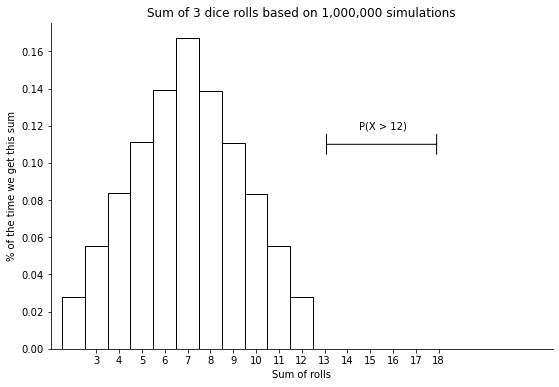

In [143]:
viz.simulation_example1(sums_by_trial)

The area shaded in lightblue represents our chance of winning, that is, the number of times that the sum of 3 dice rolls is greater than 12.

We can now convert each value in our array to a boolean value indicating whether or not we won:

In [21]:
wins = sums_by_trial > 12

To calculate an overall win rate, we can treat each win as a `1` and each loss as `0`, then take the average of the array:

In [25]:
win_rate = wins.mean()
#astype int won't change anything 


Now that we know our win rate, we can calculate the expected profit:

In [24]:
win_rate

0.2528

In [27]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost 
expected_profit

-1.2079999999999997

In [28]:
expected_winnings

3.7920000000000003

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

To answer the last part of the question, we can recalculate our win rate based on the sums being greater than or equal to 12:

In [29]:
wins = sums_by_trial >= 12
win_rate = wins.mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5604999999999993

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 58 cents.

## Mini Exercise:

What is the probability of rolling "snake eyes" on a roll of two (fair) dice?

In [41]:
(1/6) * (1/6)

0.027777777777777776

In [44]:
n_trials = n_rows = 10 ** 6
n_dice = n_cols = 2

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(n_rows, n_cols)
rolls[:5] # return 5 rows

array([[4, 6],
       [3, 4],
       [3, 6],
       [6, 5],
       [2, 2]])

In [45]:
sums_by_trial = rolls.sum(axis = 1)
sums_by_trial

array([10,  7,  9, ...,  8, 11,  4])

In [46]:
wins = (sums_by_trial == 2)
win_rate = wins.mean()
win_rate

0.027743

### No Rest or Relaxation

> There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

Let's first do a little bit of setup:

In [47]:
p_nap = 0.3
ndays = n_cols = 2
n_simulated_weekends = n_rows = 10 ** 6

To simulate the results from many weekends, we'll create a 2 x 10,000 matrix, with 2 being the number of days in a weekend and 10,000 being the number of simulations we want to run.

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [52]:
trials = np.random.random((n_rows, n_cols))

In [54]:
trials[:10]

array([[0.1367767 , 0.40150669],
       [0.67946758, 0.9117187 ],
       [0.86041917, 0.67637754],
       [0.86506057, 0.94272755],
       [0.69103015, 0.13630849],
       [0.27538732, 0.26419057],
       [0.50410272, 0.57183536],
       [0.9938433 , 0.29340247],
       [0.47347287, 0.64786301],
       [0.57648769, 0.89285144]])

In [89]:
naps = trials < p_nap

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat `True` as 1 and `False` as 0.

In [91]:
naps[:10]

array([[False, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [False, False, False],
       [ True,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False, False]])

In [92]:
naps.sum(axis=1)

array([0, 1, 0, ..., 0, 0, 0])

Now we have the results of our simulation, an array where each number in the array represents how many naps were taken in a two day weekend.

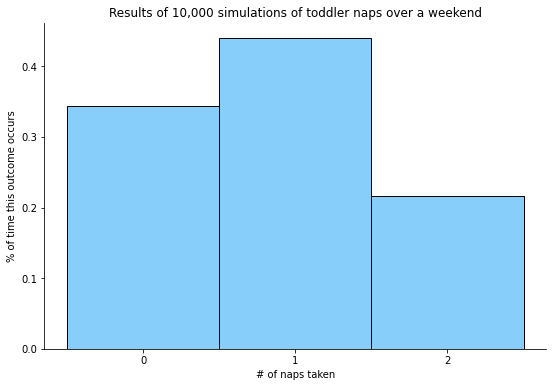

In [93]:
viz.simulation_example2(naps)

We can use this to answer our original questions, what is the probability that at least one nap is taken?

In [94]:
(naps.sum(axis=1) >= 1).mean()

0.656685

What is the probability no naps are taken?

In [95]:
(naps.sum(axis=1) == 0).mean()

0.343315

In [96]:
(naps.sum(axis=1) == 2).mean()

0.18979

## Mini Exercise:

There are ten options in a blind-box style collectable, but you are only likely to get the one you want the most at a probability of one out of every twenty boxes because its a little rarer.

What is the probability of getting your desired collectable if you buy three blindbox toys?

In [118]:
p_rare = 0.05
n_trials = n_rows = 10 ** 6
n_simulated_options = n_cols = 3 #events

In [119]:
total_purchases = np.random.random((n_rows, n_cols))
total_purchases[:5]


array([[0.55357062, 0.23196385, 0.19201863],
       [0.35317267, 0.76013939, 0.11098874],
       [0.20067441, 0.35300478, 0.27530205],
       [0.28010196, 0.72318366, 0.51650385],
       [0.97012605, 0.53106531, 0.74232114]])

In [120]:
rare_box = total_purchases < p_rare
rare_box[:10]

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False]])

In [121]:
# probability of getting at least 1 rare box
(rare_box.sum(axis=1) >= 1).mean()

0.142822

In [99]:
# probability of getting 3 rare boxes
(rare_box.sum(axis=1) == 3).mean()

0.000127

### One With Dataframes

Let's take a look at one more problem:

> What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

In [114]:
n_trials = nrows = 10 ** 6
n_dice_rolled = ncols = 3 #number of dice

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice_rolled).reshape(nrows, n_cols)
rolls

array([[3, 1, 3],
       [1, 5, 4],
       [6, 3, 5],
       ...,
       [3, 3, 1],
       [6, 1, 1],
       [4, 6, 1]])

In [109]:
#to create df
(pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis =1)).mean()
# checking if 3 in the row values for columns

0.421298

Let's break down what's going on here:

1. First we assign values for the number of rows and columns we are going to use
1. Next we create the `rolls` variable that holds a 3 x 10,000 matrix where each element is a randomly chosen number from 1 to 6
1. Lastly we create a dataframe from the rolls
    1. `pd.DataFrame(rolls)` converts our 2d numpy matrix to a pandas DataFrame
    1. `.apply(...` applies a function to each **row** in our dataframe, because we specified `axis=1`, the function will be called with each row as it's argument. The body of the function checks to see if the value `3` is in the values of the row, and will return either `True` or `False`
    1. `.mean()` takes our resulting series of boolean values, and treats `True` as 1 and `False` as 0, to give us the average rate of `True`s, in this case, the simulated probability of getting a 3 in 3 dice rolls.

## Mini Exercise:

Recreate the blindbox problem utilizing the above strategy!


In [131]:
# using random.choice
# blindbox has a bias against the one we want 
n_rows = 10_000
n_cols = 3 # 3 blind boxes

# 1 of the 10 possible options for the blindbox
outcomes = [1,2,3,4,5,6,7,8,9,10]
prob_win = 0.05
# 1 minus prob_win divide by 9 other boxes
prob_others = (1-0.05)/9

In [133]:
# if you don't specify prob_win and prob_others probability will be equally distributed among all events like in a fair die
data = np.random.choice(outcomes, n_rows * n_cols, p = [prob_win,prob_others, prob_others, prob_others, prob_others, prob_others, prob_others,prob_others, prob_others, prob_others]).reshape(n_rows, n_cols)

In [134]:
data[:5]

array([[8, 1, 9],
       [3, 6, 8],
       [5, 2, 5],
       [9, 1, 2],
       [2, 4, 8]])

In [135]:
(pd.DataFrame(data).apply(lambda row: 1 in row.values, axis =1)).mean()

0.1397